In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn import under_sampling, over_sampling

#Metric Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics

#Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded1 = drive.CreateFile({'id':'1IC3QuIHua1_LiSshievODd4WWwZ5VwWl'})
downloaded2 = drive.CreateFile({'id':'1EcpFUTIZUlYgADZi24v8_f68GAIZdzn9'})

downloaded1.GetContentFile('panic_disorder_dataset_testing.csv')
downloaded2.GetContentFile('panic_disorder_dataset_training.csv')

In [5]:
raw_1 = pd.read_csv('panic_disorder_dataset_testing.csv')
raw_2 = pd.read_csv('panic_disorder_dataset_training.csv')

In [6]:
raw_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           20000 non-null  object
 11  Psychiatric History       20000 non-null  object
 12  Substance Use             20000 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [7]:
raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           100000 non-null  object
 11  Psychiatric History       100000 non-null  object
 12  Substance Use             100000 non-null  object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [8]:
df = pd.concat([raw_1,raw_2], ignore_index=True)
df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,None,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,None,Seeking therapy,Low,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,None,None,Socializing,Low,Diet,0
119996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,None,Meditation,High,Diet,0
119997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,None,Seeking therapy,Low,Exercise,0
119998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            120000 non-null  int64 
 1   Age                       120000 non-null  int64 
 2   Gender                    120000 non-null  object
 3   Family History            120000 non-null  object
 4   Personal History          120000 non-null  object
 5   Current Stressors         120000 non-null  object
 6   Symptoms                  120000 non-null  object
 7   Severity                  120000 non-null  object
 8   Impact on Life            120000 non-null  object
 9   Demographics              120000 non-null  object
 10  Medical History           120000 non-null  object
 11  Psychiatric History       120000 non-null  object
 12  Substance Use             120000 non-null  object
 13  Coping Mechanisms         120000 non-null  object
 14  Soci

In [10]:
df_copy = df.copy()
df_copy

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,None,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,None,Seeking therapy,Low,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,None,None,Socializing,Low,Diet,0
119996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,None,Meditation,High,Diet,0
119997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,None,Seeking therapy,Low,Exercise,0
119998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [11]:
df_copy.duplicated().sum()

0

In [12]:
New_Columns_Name = ['ID','Age','Gender','Family_History','Personal_History','Current_Stressors','Symptom','Severity',
                    'Impact_Onlife','Demographics','Medical_History','Psychiatric_History','Substance_Use','Coping_Mechanism',
                    'Social_Support','Lifestyle_Factors','PD_Diagnose']


df_copy = df_copy.set_axis(New_Columns_Name, axis='columns', inplace=False)
df_copy

,ID,Age,Gender,Family_History,Personal_History,Current_Stressors,Symptom,Severity,Impact_Onlife,Demographics,Medical_History,Psychiatric_History,Substance_Use,Coping_Mechanism,Social_Support,Lifestyle_Factors,PD_Diagnose
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,None,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,None,Seeking therapy,Low,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,None,None,Socializing,Low,Diet,0
119996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,None,Meditation,High,Diet,0
119997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,None,Seeking therapy,Low,Exercise,0
119998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   120000 non-null  int64 
 1   Age                  120000 non-null  int64 
 2   Gender               120000 non-null  object
 3   Family_History       120000 non-null  object
 4   Personal_History     120000 non-null  object
 5   Current_Stressors    120000 non-null  object
 6   Symptom              120000 non-null  object
 7   Severity             120000 non-null  object
 8   Impact_Onlife        120000 non-null  object
 9   Demographics         120000 non-null  object
 10  Medical_History      120000 non-null  object
 11  Psychiatric_History  120000 non-null  object
 12  Substance_Use        120000 non-null  object
 13  Coping_Mechanism     120000 non-null  object
 14  Social_Support       120000 non-null  object
 15  Lifestyle_Factors    120000 non-nu

In [14]:
nums = ['ID','Age','PD_Diagnose']
cats = ['Gender','Family_History','Personal_History','Current_Stressors','Symptom','Severity','Impact_Onlife','Demographics',
        'Medical_History','Psychiatric_History','Substance_Use','Coping_Mechanism','Social_Support','Lifestyle_Factors']

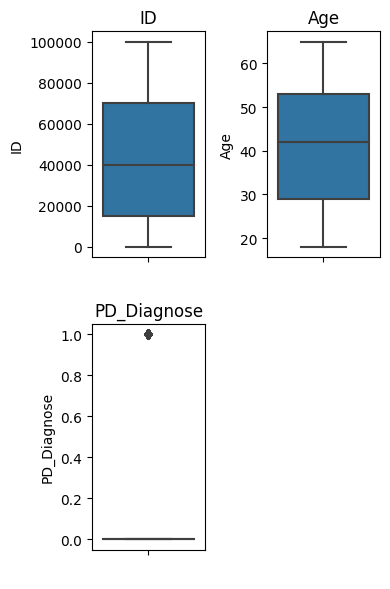

In [15]:
plt.figure(figsize=(4,6))
for i in range (0, len(nums)):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df_copy[nums[i]])
    plt.title(nums[i], loc='Center')
    plt.xlabel(nums[i], color='w')
    plt.tight_layout()

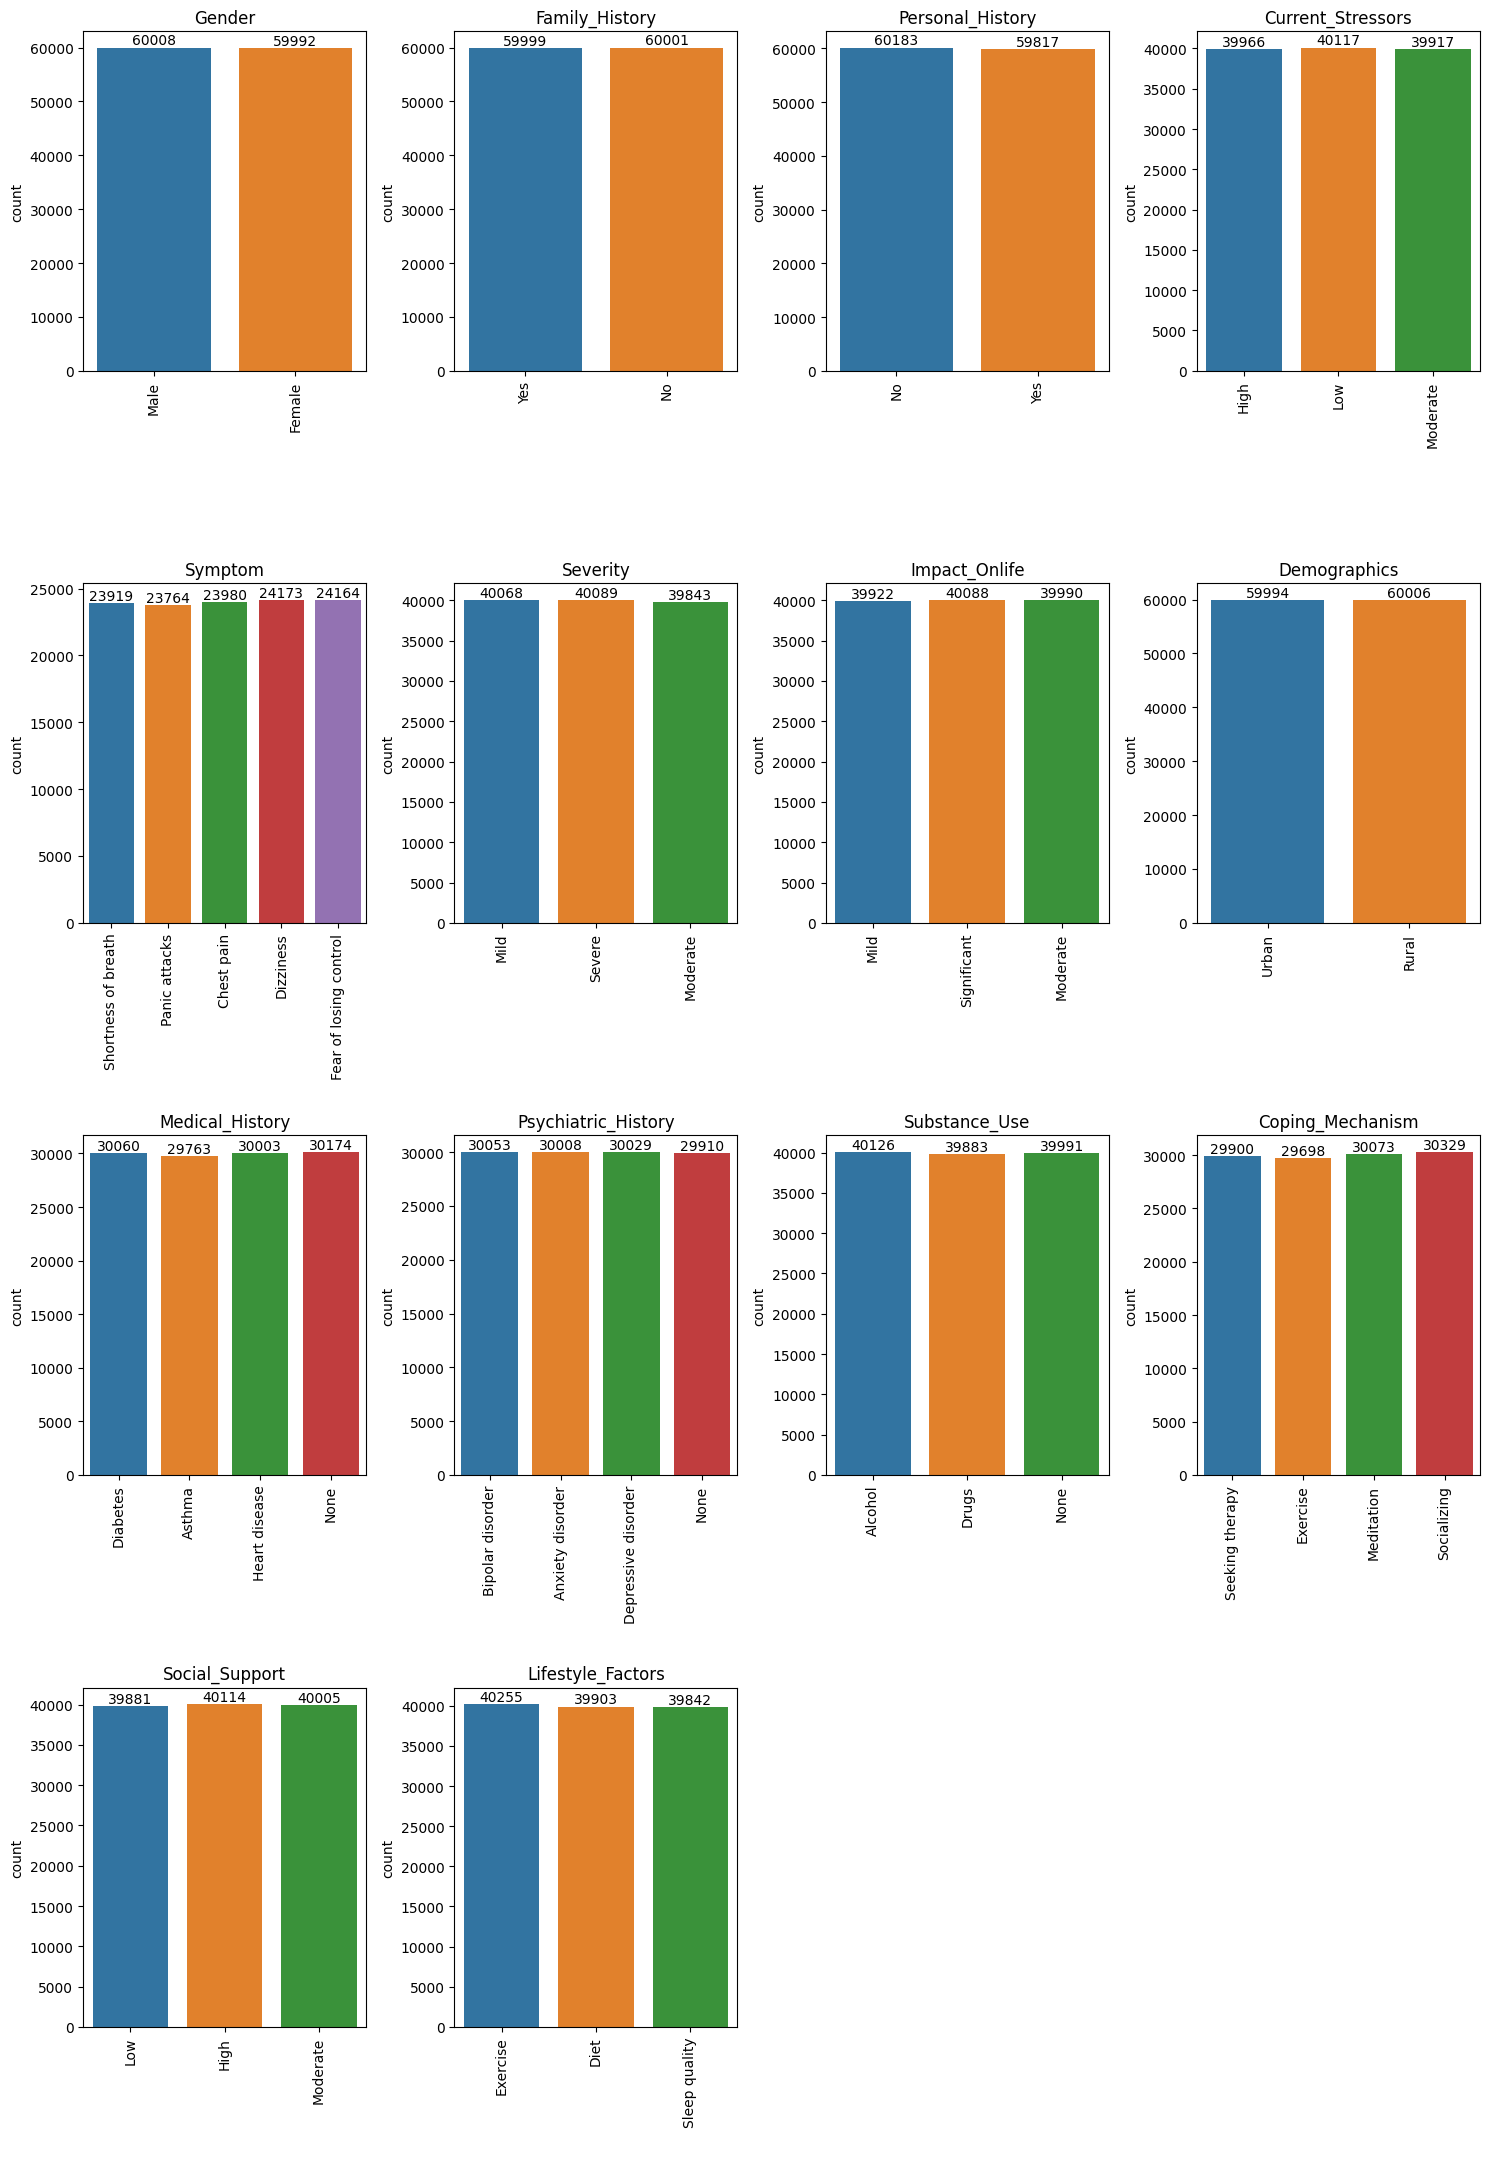

In [16]:
plt.figure(figsize=(15,26))
for i in range (0, len(cats)):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=df_copy[cats[i]])
    plt.title(cats[i], loc='Center')
    plt.xticks(rotation=90)
    plt.xlabel(cats[i], color='w')
    plt.tight_layout()
    ax = sns.countplot(x=df_copy[cats[i]])
    ax.bar_label(ax.containers[0])

In [17]:
gender_compare = df_copy.groupby(['Gender']).agg(mod_Family_History=('Family_History','max'),
                                                 mod_Personal_History=('Personal_History','max'),
                                                 mod_Current_Stressors=('Current_Stressors','max'),
                                                 mod_Symptom=('Symptom','max'),
                                                 mod_Severity=('Severity','max'),
                                                 mod_Impact_Onlife=('Impact_Onlife','max'),
                                                 mod_Demographics=('Demographics','max'),
                                                 mod_Medical_History=('Medical_History','max'),
                                                 mod_Psychiatric_History=('Psychiatric_History','max'),
                                                 mod_Substance_Use=('Substance_Use','max'),
                                                 mod_Coping_Mechanism=('Coping_Mechanism','max'),
                                                 mod_Social_Support=('Social_Support','max'),
                                                 mod_Lifestyle_Factors=('Lifestyle_Factors','max')).reset_index()
gender_compare

,Gender,mod_Family_History,mod_Personal_History,mod_Current_Stressors,mod_Symptom,mod_Severity,mod_Impact_Onlife,mod_Demographics,mod_Medical_History,mod_Psychiatric_History,mod_Substance_Use,mod_Coping_Mechanism,mod_Social_Support,mod_Lifestyle_Factors
0,Female,Yes,Yes,Moderate,Shortness of breath,Severe,Significant,Urban,None,None,None,Socializing,Moderate,Sleep quality
1,Male,Yes,Yes,Moderate,Shortness of breath,Severe,Significant,Urban,None,None,None,Socializing,Moderate,Sleep quality


In [18]:
diagnose_compare = df_copy.groupby(['PD_Diagnose']).agg(mod_Gender=('Gender','max'),
                                                        mod_Family_History=('Family_History','max'),
                                                        mod_Personal_History=('Personal_History','max'),
                                                        mod_Current_Stressors=('Current_Stressors','max'),
                                                        mod_Symptom=('Symptom','max'),
                                                        mod_Severity=('Severity','max'),
                                                        mod_Impact_Onlife=('Impact_Onlife','max'),
                                                        mod_Demographics=('Demographics','max'),
                                                        mod_Medical_History=('Medical_History','max'),
                                                        mod_Psychiatric_History=('Psychiatric_History','max'),
                                                        mod_Substance_Use=('Substance_Use','max'),
                                                        mod_Coping_Mechanism=('Coping_Mechanism','max'),
                                                        mod_Social_Support=('Social_Support','max'),
                                                        mod_Lifestyle_Factors=('Lifestyle_Factors','max')).reset_index()
diagnose_compare

,PD_Diagnose,mod_Gender,mod_Family_History,mod_Personal_History,mod_Current_Stressors,mod_Symptom,mod_Severity,mod_Impact_Onlife,mod_Demographics,mod_Medical_History,mod_Psychiatric_History,mod_Substance_Use,mod_Coping_Mechanism,mod_Social_Support,mod_Lifestyle_Factors
0,0,Male,Yes,Yes,Moderate,Shortness of breath,Severe,Significant,Urban,None,None,None,Socializing,Moderate,Sleep quality
1,1,Male,Yes,Yes,Moderate,Shortness of breath,Severe,Significant,Urban,None,None,None,Socializing,Moderate,Sleep quality


In [19]:
df_PD_Diagnose = df_copy[df_copy['PD_Diagnose'] == 1]
df_PD_Diagnose.groupby(pd.cut(df_PD_Diagnose['Age'], [0, 20, 30, 40, 50, 70]))['PD_Diagnose'].count()

Age
(0, 20]      340
(20, 30]    1032
(30, 40]    1050
(40, 50]    1123
(50, 70]    1581
Name: PD_Diagnose, dtype: int64

In [20]:
df_copy.head()

,ID,Age,Gender,Family_History,Personal_History,Current_Stressors,Symptom,Severity,Impact_Onlife,Demographics,Medical_History,Psychiatric_History,Substance_Use,Coping_Mechanism,Social_Support,Lifestyle_Factors,PD_Diagnose
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,None,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,None,Seeking therapy,Low,Exercise,0


In [21]:
df_copy['Coping_Mechanism'].unique()

array(['Seeking therapy', 'Exercise', 'Meditation', 'Socializing'],
      dtype=object)

In [22]:
df_copy1 = df_copy.copy()

In [23]:
df_copy1 = df_copy1.join(pd.get_dummies(df_copy1[['Gender','Symptom','Demographics','Medical_History','Psychiatric_History',
                                                  'Coping_Mechanism','Lifestyle_Factors']]))

df_copy1 = df_copy1.drop(['Gender','Symptom','Demographics','Medical_History',
                          'Psychiatric_History','Coping_Mechanism','Lifestyle_Factors'], axis='columns', inplace=False)

df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   ID                                       120000 non-null  int64 
 1   Age                                      120000 non-null  int64 
 2   Family_History                           120000 non-null  object
 3   Personal_History                         120000 non-null  object
 4   Current_Stressors                        120000 non-null  object
 5   Severity                                 120000 non-null  object
 6   Impact_Onlife                            120000 non-null  object
 7   Substance_Use                            120000 non-null  object
 8   Social_Support                           120000 non-null  object
 9   PD_Diagnose                              120000 non-null  int64 
 10  Gender_Female                            120

In [24]:
Map_Family_History = {'Yes':1 , 'No':0}
Map_Personal_History = {'Yes':1 , 'No':0}
Map_Current_Stressors = {'Low':1 , 'Moderate':2 , 'High':3}
Map_Severity = {'Mild':1 , 'Moderate':2 , 'Severe':3}
Map_Impact_Onlife = {'Mild':1 , 'Moderate':2 , 'Significant':3}
Map_Substance_Use = {'None':0 , 'Alcohol':1 , 'Drugs':2}
Map_Social_Support = {'Low':1 , 'Moderate':2 , 'High':3}

df_copy1['Family_History_AMap'] = df_copy1['Family_History'].map(Map_Family_History)
df_copy1['Personal_History_AMap'] = df_copy1['Personal_History'].map(Map_Personal_History)
df_copy1['Current_Stressors_AMap'] = df_copy1['Current_Stressors'].map(Map_Current_Stressors)
df_copy1['Severity_AMap'] = df_copy1['Severity'].map(Map_Severity)
df_copy1['Impact_Onlife_AMap'] = df_copy1['Impact_Onlife'].map(Map_Impact_Onlife)
df_copy1['Substance_Use_AMap'] = df_copy1['Substance_Use'].map(Map_Substance_Use)
df_copy1['Social_Support_AMap'] = df_copy1['Social_Support'].map(Map_Social_Support)

df_copy1 = df_copy1.drop(['Family_History','Personal_History','Current_Stressors','Severity','Impact_Onlife',
                          'Substance_Use','Social_Support'], axis='columns', inplace=False)

df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   ID                                       120000 non-null  int64
 1   Age                                      120000 non-null  int64
 2   PD_Diagnose                              120000 non-null  int64
 3   Gender_Female                            120000 non-null  uint8
 4   Gender_Male                              120000 non-null  uint8
 5   Symptom_Chest pain                       120000 non-null  uint8
 6   Symptom_Dizziness                        120000 non-null  uint8
 7   Symptom_Fear of losing control           120000 non-null  uint8
 8   Symptom_Panic attacks                    120000 non-null  uint8
 9   Symptom_Shortness of breath              120000 non-null  uint8
 10  Demographics_Rural                       120000 non-null

In [25]:
df_copy1.head()

,ID,Age,PD_Diagnose,Gender_Female,Gender_Male,Symptom_Chest pain,Symptom_Dizziness,Symptom_Fear of losing control,Symptom_Panic attacks,Symptom_Shortness of breath,...,Lifestyle_Factors_Diet,Lifestyle_Factors_Exercise,Lifestyle_Factors_Sleep quality,Family_History_AMap,Personal_History_AMap,Current_Stressors_AMap,Severity_AMap,Impact_Onlife_AMap,Substance_Use_AMap,Social_Support_AMap
0,1,41,0,0,1,0,0,0,0,1,...,0,1,0,1,0,3,1,1,1,1
1,2,20,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,1,3,2,3
2,3,32,0,0,1,0,0,0,1,0,...,0,1,0,1,1,3,3,1,2,2
3,4,41,0,1,0,0,0,0,0,1,...,0,0,1,1,1,2,2,3,0,3
4,5,36,0,1,0,1,0,0,0,0,...,0,1,0,1,0,3,3,3,0,1


In [26]:
df_copy1 = df_copy1.drop(['ID'], axis='columns', inplace=False)
df_copy1.head()

,Age,PD_Diagnose,Gender_Female,Gender_Male,Symptom_Chest pain,Symptom_Dizziness,Symptom_Fear of losing control,Symptom_Panic attacks,Symptom_Shortness of breath,Demographics_Rural,...,Lifestyle_Factors_Diet,Lifestyle_Factors_Exercise,Lifestyle_Factors_Sleep quality,Family_History_AMap,Personal_History_AMap,Current_Stressors_AMap,Severity_AMap,Impact_Onlife_AMap,Substance_Use_AMap,Social_Support_AMap
0,41,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,3,1,1,1,1
1,20,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,1,3,2,3
2,32,0,0,1,0,0,0,1,0,1,...,0,1,0,1,1,3,3,1,2,2
3,41,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,2,2,3,0,3
4,36,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,3,3,3,0,1


In [27]:
X = df_copy1.drop(['PD_Diagnose'], axis=1) 
Y = df_copy1['PD_Diagnose']

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
# LogisticRegression
Log_Reg_Normal = linear_model.LogisticRegression()
Log_Reg_Normal.fit(X_train,Y_train)
Pred_Log_Reg_Normal = Log_Reg_Normal.predict(X_test)

# RandomForestClassifier
Rand_Forest_Normal = RandomForestClassifier(random_state=42)
Rand_Forest_Normal.fit(X_train, Y_train)
Pred_Rand_Forest_Normal = Rand_Forest_Normal.predict(X_test)

# DecisionTreeClassifier
Dec_Tree_Normal = DecisionTreeClassifier(random_state=42)
Dec_Tree_Normal.fit(X_train,Y_train)
Pred_Dec_Tree_Normal = Dec_Tree_Normal.predict(X_test)

# ExtraTreesClassifier
Extra_Tree_Normal = ExtraTreesClassifier()
Extra_Tree_Normal.fit(X_train, Y_train)
Pred_Extra_Tree_Normal = Extra_Tree_Normal.predict(X_test)

# Gradient Boosting
Grad_Boost_Normal = GradientBoostingClassifier()
Grad_Boost_Normal.fit(X_train, Y_train)
Pred_Grad_Boost_Normal = Grad_Boost_Normal.predict(X_test)

In [29]:
ModelR1 = pd.DataFrame({'Model' : ['Logistic_Regression','Random_Forest','Decision_Tree','Extra_Trees','Gradient_Boosting'],
                        'Recall' : [recall_score(Y_test, Pred_Log_Reg_Normal),recall_score(Y_test,Pred_Rand_Forest_Normal),
                                    recall_score(Y_test,Pred_Dec_Tree_Normal),recall_score(Y_test,Pred_Extra_Tree_Normal),
                                    recall_score(Y_test,Pred_Grad_Boost_Normal)],
                        'AUC' : [roc_auc_score(Y_test, Pred_Log_Reg_Normal),roc_auc_score(Y_test,Pred_Rand_Forest_Normal),
                                 roc_auc_score(Y_test,Pred_Dec_Tree_Normal),roc_auc_score(Y_test,Pred_Extra_Tree_Normal),
                                 roc_auc_score(Y_test,Pred_Grad_Boost_Normal)],
                        'F1 Score':[f1_score(Y_test, Pred_Log_Reg_Normal),f1_score(Y_test,Pred_Rand_Forest_Normal),
                                    f1_score(Y_test,Pred_Dec_Tree_Normal),f1_score(Y_test,Pred_Extra_Tree_Normal),
                                    f1_score(Y_test,Pred_Grad_Boost_Normal)],
                         'Accuracy':[accuracy_score(Y_test, Pred_Log_Reg_Normal),accuracy_score(Y_test,Pred_Rand_Forest_Normal),
                                     accuracy_score(Y_test,Pred_Dec_Tree_Normal),accuracy_score(Y_test,Pred_Extra_Tree_Normal),
                                     accuracy_score(Y_test,Pred_Grad_Boost_Normal)]
                        })
ModelR1

,Model,Recall,AUC,F1 Score,Accuracy
0,Logistic_Regression,0.479284,0.734999,0.570628,0.968083
1,Random_Forest,0.987759,0.993879,0.993842,0.999458
2,Decision_Tree,0.999058,0.999398,0.996712,0.999708
3,Extra_Trees,0.954802,0.977379,0.976408,0.997958
4,Gradient_Boosting,1.000000,0.999956,0.999059,0.999917


In [30]:
Under_Sampling = RandomUnderSampler(random_state=42)
X_Under_Sampling, Y_Under_Sampling = Under_Sampling.fit_resample(X_train, Y_train)

Over_Sampling = RandomOverSampler(random_state=42)
X_Over_Sampling, Y_Over_Sampling = Over_Sampling.fit_resample(X_train, Y_train)

In [31]:
# Under Sampling LogisticRegression
Log_Reg_US = linear_model.LogisticRegression()
Log_Reg_US.fit(X_Under_Sampling,Y_Under_Sampling)
Pred_Log_Reg_US = Log_Reg_US.predict(X_test)

# Under Sampling Random Forest
Rand_Forest_US = RandomForestClassifier(random_state=42)
Rand_Forest_US.fit(X_Under_Sampling, Y_Under_Sampling)
Pred_Rand_Forest_US = Rand_Forest_US.predict(X_test)

# Under Sampling Decision Tree
Dec_Tree_US = DecisionTreeClassifier(random_state=42)
Dec_Tree_US.fit(X_Under_Sampling,Y_Under_Sampling)
Pred_Dec_Tree_US = Dec_Tree_US.predict(X_test)

# Under Sampling Extra Trees
Extra_Tree_US = ExtraTreesClassifier()
Extra_Tree_US.fit(X_Under_Sampling, Y_Under_Sampling)
Pred_Extra_Tree_US = Extra_Tree_US.predict(X_test)

# Under Sampling Gradient Boosting
Grad_Boost_US = GradientBoostingClassifier()
Grad_Boost_US.fit(X_Under_Sampling, Y_Under_Sampling)
Pred_Grad_Boost_US = Grad_Boost_US.predict(X_test)

In [32]:
ModelR2 = pd.DataFrame({'Model' : ['Logistic_Regression_US','Random_Forest_US','Decision_Tree_US','Extra_Trees_US',
                                   'Gradient_Boosting_US'],
                        'Recall' : [recall_score(Y_test, Pred_Log_Reg_US),recall_score(Y_test,Pred_Rand_Forest_US),
                                    recall_score(Y_test,Pred_Dec_Tree_US),recall_score(Y_test,Pred_Extra_Tree_US),
                                    recall_score(Y_test,Pred_Grad_Boost_US)],
                        'AUC' : [roc_auc_score(Y_test, Pred_Log_Reg_US),roc_auc_score(Y_test,Pred_Rand_Forest_US),
                                 roc_auc_score(Y_test,Pred_Dec_Tree_US),roc_auc_score(Y_test,Pred_Extra_Tree_US),
                                 roc_auc_score(Y_test,Pred_Grad_Boost_US)],
                        'F1 Score':[f1_score(Y_test, Pred_Log_Reg_US),f1_score(Y_test,Pred_Rand_Forest_US),
                                    f1_score(Y_test,Pred_Dec_Tree_US),f1_score(Y_test,Pred_Extra_Tree_US),
                                    f1_score(Y_test,Pred_Grad_Boost_US)],
                         'Accuracy':[accuracy_score(Y_test, Pred_Log_Reg_US),accuracy_score(Y_test,Pred_Rand_Forest_US),
                                     accuracy_score(Y_test,Pred_Dec_Tree_US),accuracy_score(Y_test,Pred_Extra_Tree_US),
                                     accuracy_score(Y_test,Pred_Grad_Boost_US)]
                        })
ModelR2

,Model,Recall,AUC,F1 Score,Accuracy
0,Logistic_Regression_US,0.975518,0.939651,0.481301,0.906958
1,Random_Forest_US,1.000000,0.992044,0.853355,0.984792
2,Decision_Tree_US,0.999058,0.997873,0.964984,0.996792
3,Extra_Trees_US,1.000000,0.993308,0.873715,0.987208
4,Gradient_Boosting_US,1.000000,0.998561,0.969863,0.997250


In [33]:
# Over Sampling LogisticRegression
Log_Reg_OS = linear_model.LogisticRegression()
Log_Reg_OS.fit(X_Over_Sampling,Y_Over_Sampling)
Pred_Log_Reg_OS = Log_Reg_OS.predict(X_test)

# Under Sampling Random Forest
Rand_Forest_OS = RandomForestClassifier(random_state=42)
Rand_Forest_OS.fit(X_Over_Sampling, Y_Over_Sampling)
Pred_Rand_Forest_OS = Rand_Forest_OS.predict(X_test)

# Under Sampling Decision Tree
Dec_Tree_OS = DecisionTreeClassifier(random_state=42)
Dec_Tree_OS.fit(X_Over_Sampling,Y_Over_Sampling)
Pred_Dec_Tree_OS = Dec_Tree_OS.predict(X_test)

# Under Sampling Extra Trees
Extra_Tree_OS = ExtraTreesClassifier()
Extra_Tree_OS.fit(X_Over_Sampling, Y_Over_Sampling)
Pred_Extra_Tree_OS = Extra_Tree_OS.predict(X_test)

# Under Sampling Gradient Boosting
Grad_Boost_OS = GradientBoostingClassifier()
Grad_Boost_OS.fit(X_Over_Sampling, Y_Over_Sampling)
Pred_Grad_Boost_OS = Grad_Boost_OS.predict(X_test)

In [34]:
ModelR3 = pd.DataFrame({'Model' : ['Logistic_Regression_OS','Random_Forest_OS','Decision_Tree_OS','Extra_Trees_OS',
                                   'Gradient_Boosting_OS'],
                        'Recall' : [recall_score(Y_test, Pred_Log_Reg_OS),recall_score(Y_test,Pred_Rand_Forest_OS),
                                    recall_score(Y_test,Pred_Dec_Tree_OS),recall_score(Y_test,Pred_Extra_Tree_OS),
                                    recall_score(Y_test,Pred_Grad_Boost_OS)],
                        'AUC' : [roc_auc_score(Y_test, Pred_Log_Reg_OS),roc_auc_score(Y_test,Pred_Rand_Forest_OS),
                                 roc_auc_score(Y_test,Pred_Dec_Tree_OS),roc_auc_score(Y_test,Pred_Extra_Tree_OS),
                                 roc_auc_score(Y_test,Pred_Grad_Boost_OS)],
                        'F1 Score':[f1_score(Y_test, Pred_Log_Reg_OS),f1_score(Y_test,Pred_Rand_Forest_OS),
                                    f1_score(Y_test,Pred_Dec_Tree_OS),f1_score(Y_test,Pred_Extra_Tree_OS),
                                    f1_score(Y_test,Pred_Grad_Boost_OS)],
                         'Accuracy':[accuracy_score(Y_test, Pred_Log_Reg_OS),accuracy_score(Y_test,Pred_Rand_Forest_OS),
                                     accuracy_score(Y_test,Pred_Dec_Tree_OS),accuracy_score(Y_test,Pred_Extra_Tree_OS),
                                     accuracy_score(Y_test,Pred_Grad_Boost_OS)]
                        })
ModelR3

,Model,Recall,AUC,F1 Score,Accuracy
0,Logistic_Regression_OS,0.975518,0.942594,0.496882,0.912583
1,Random_Forest_OS,0.987759,0.993879,0.993842,0.999458
2,Decision_Tree_OS,1.000000,0.999978,0.999529,0.999958
3,Extra_Trees_OS,0.954802,0.977401,0.976879,0.998000
4,Gradient_Boosting_OS,1.000000,0.998779,0.974312,0.997667


<Figure size 2000x1500 with 0 Axes>

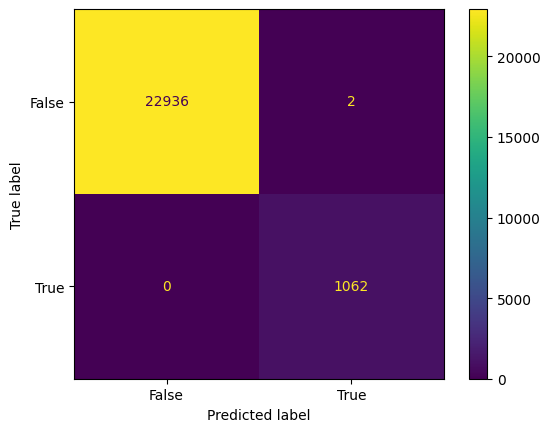

In [36]:
Matrix_Grad_Boost = metrics.confusion_matrix(Y_test, Pred_Grad_Boost_Normal)
ConMat_Display_Grad_Boost = metrics.ConfusionMatrixDisplay(confusion_matrix = Matrix_Grad_Boost,
                                                           display_labels = [False, True])


plt.figure(figsize=(20,15))
ConMat_Display_Grad_Boost.plot()
plt.show()